In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df=pd.read_csv(r"/home/natty/Documents/vc/Walmart_sales.csv")
df





,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
#inspact the data 
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
# check if the data have null file 
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:

# change the date to datetime format
df["Date"] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)



In [6]:


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
sorted_df = df.sort_values(by=['Store', 'Date'], ascending=True)

print(sorted_df)





      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

In [8]:
# set the date format to mm-dd-yy

df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

In [9]:
# rounded to 2 decimal numbers 
df['Weekly_Sales'] = df['Weekly_Sales'].round(2)

In [10]:
df['Weekly_Sales']



0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [11]:
# rounded to nearest whole numbers 
df['Temperature'] = df['Temperature'].round(0)

In [12]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42.0,2.572,211.096358,8.106
1,1,02-12-2010,1641957.44,1,39.0,2.548,211.242170,8.106
2,1,02-19-2010,1611968.17,0,40.0,2.514,211.289143,8.106
3,1,02-26-2010,1409727.59,0,47.0,2.561,211.319643,8.106
4,1,03-05-2010,1554806.68,0,46.0,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,09-28-2012,713173.95,0,65.0,3.997,192.013558,8.684
6431,45,10-05-2012,733455.07,0,65.0,3.985,192.170412,8.667
6432,45,10-12-2012,734464.36,0,54.0,4.000,192.327265,8.667
6433,45,10-19-2012,718125.53,0,56.0,3.969,192.330854,8.667


In [13]:
# rounded to 2 decimal numbers 
df['Fuel_Price'] = df['Fuel_Price'].round(2)

In [14]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42.0,2.57,211.096358,8.106
1,1,02-12-2010,1641957.44,1,39.0,2.55,211.242170,8.106
2,1,02-19-2010,1611968.17,0,40.0,2.51,211.289143,8.106
3,1,02-26-2010,1409727.59,0,47.0,2.56,211.319643,8.106
4,1,03-05-2010,1554806.68,0,46.0,2.62,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,09-28-2012,713173.95,0,65.0,4.00,192.013558,8.684
6431,45,10-05-2012,733455.07,0,65.0,3.98,192.170412,8.667
6432,45,10-12-2012,734464.36,0,54.0,4.00,192.327265,8.667
6433,45,10-19-2012,718125.53,0,56.0,3.97,192.330854,8.667


In [15]:
# rounded to 3 decimal numbers 

df['CPI'] = df['CPI'].round(3)

In [16]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42.0,2.57,211.096,8.106
1,1,02-12-2010,1641957.44,1,39.0,2.55,211.242,8.106
2,1,02-19-2010,1611968.17,0,40.0,2.51,211.289,8.106
3,1,02-26-2010,1409727.59,0,47.0,2.56,211.320,8.106
4,1,03-05-2010,1554806.68,0,46.0,2.62,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45,09-28-2012,713173.95,0,65.0,4.00,192.014,8.684
6431,45,10-05-2012,733455.07,0,65.0,3.98,192.170,8.667
6432,45,10-12-2012,734464.36,0,54.0,4.00,192.327,8.667
6433,45,10-19-2012,718125.53,0,56.0,3.97,192.331,8.667


In [17]:
# rounded to 3 decimal numbers 
df['Unemployment'] = df['Unemployment'].round(3)

In [18]:
holiday_df = df[df['Holiday_Flag'] == 1]

In [19]:
holiday_df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,02-12-2010,1641957.44,1,39.0,2.55,211.242,8.106
31,1,09-10-2010,1507460.69,1,79.0,2.56,211.495,7.787
42,1,11-26-2010,1955624.11,1,65.0,2.74,211.748,7.838
47,1,12-31-2010,1367320.01,1,48.0,2.94,211.405,7.838
53,1,02-11-2011,1649614.93,1,36.0,3.02,212.937,7.742
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.0,3.74,186.674,8.625
6386,45,11-25-2011,1170672.94,1,49.0,3.49,188.350,8.523
6391,45,12-30-2011,869403.63,1,38.0,3.39,189.062,8.523
6397,45,02-10-2012,803657.12,1,37.0,3.64,189.708,8.424


In [20]:
orted_df = holiday_df.sort_values(by=['Weekly_Sales'], ascending=False)
print(orted_df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
523       4  11-25-2011    3004702.33             1         48.0        3.22   
1381     10  11-25-2011    2950198.64             1         61.0        3.76   
1329     10  11-26-2010    2939946.38             1         55.0        3.16   
1901     14  11-26-2010    2921709.71             1         46.0        3.04   
2811     20  11-25-2011    2906233.25             1         46.0        3.49   
...     ...         ...           ...           ...          ...         ...   
4670     33  11-25-2011     255996.47             1         62.0        3.76   
6196     44  12-31-2010     241937.11             1         27.0        2.87   
4618     33  11-26-2010     240044.57             1         57.0        3.16   
4623     33  12-31-2010     219804.85             1         53.0        3.15   
4675     33  12-30-2011     215359.21             1         52.0        3.43   

          CPI  Unemployment  
523   129

In [21]:
holiday_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,450.000000,4.500000e+02,450.0,450.000000,450.000000,450.000000,450.000000
mean,23.000000,1.122888e+06,1.0,50.257778,3.228000,171.268120,8.074127
std,13.001627,6.276849e+05,0.0,20.059938,0.408275,39.291429,1.879293
min,1.000000,2.153592e+05,1.0,10.000000,2.510000,126.115000,4.077000
25%,12.000000,5.758655e+05,1.0,33.000000,2.940000,131.587000,7.015000
50%,23.000000,1.018538e+06,1.0,48.000000,3.180000,182.598000,7.890000
75%,34.000000,1.555213e+06,1.0,67.000000,3.550000,211.760000,8.625000
max,45.000000,3.004702e+06,1.0,96.000000,4.120000,226.210000,14.313000


In [22]:
avg_weekly_sales = holiday_df['Weekly_Sales'].mean()

avg_weekly_sales

1122887.8923555557

In [ ]:
df["ed"] = df["Date"].str.split("-").str[:2].str.join("-")

In [56]:
sb = df[df['Holiday_Flag'] == 1]

In [57]:
holiday_impact = sb.groupby('ed')['Weekly_Sales'].mean() - avg_weekly_sales

holiday_impact

ed
02-10    -11567.716356
02-11    -70972.497022
02-12    -48739.500578
09-07    -48886.574356
09-09    -83705.058356
09-10   -108790.162578
11-25    356970.002311
11-26    339801.068533
12-30    -99722.091467
12-31   -224387.470133
Name: Weekly_Sales, dtype: float64

In [58]:
# Identify holiday with the most significant impact (positive or negative)
most_impactful_holiday = holiday_impact.idxmax() if holiday_impact.max() > 0 else holiday_impact.idxmin()
impact_value = holiday_impact.max() if holiday_impact.max() > 0 else holiday_impact.min()


print(f"The holiday with the most significant impact on weekly sales is '{most_impactful_holiday}', with an average difference of {impact_value:.2f} compared to the average weekly sales.")

The holiday with the most significant impact on weekly sales is '11-25', with an average difference of 356970.00 compared to the average weekly sales.


In [26]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,1643690.90,0,42.0,2.57,211.096,8.106
1,1,02-12-2010,1641957.44,1,39.0,2.55,211.242,8.106
2,1,02-19-2010,1611968.17,0,40.0,2.51,211.289,8.106
3,1,02-26-2010,1409727.59,0,47.0,2.56,211.320,8.106
4,1,03-05-2010,1554806.68,0,46.0,2.62,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45,09-28-2012,713173.95,0,65.0,4.00,192.014,8.684
6431,45,10-05-2012,733455.07,0,65.0,3.98,192.170,8.667
6432,45,10-12-2012,734464.36,0,54.0,4.00,192.327,8.667
6433,45,10-19-2012,718125.53,0,56.0,3.97,192.331,8.667


In [27]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [28]:
#Which stores in the dataset have the lowest and highest unemployment rate? 
lowest_unemployment_store = df['Store'].iloc[df['Unemployment'].idxmin()]
highest_unemployment_store = df['Store'].iloc[df['Unemployment'].idxmax()]

print("Store with lowest unemployment rate:", lowest_unemployment_store)
print("Store with highest unemployment rate:", highest_unemployment_store)

Store with lowest unemployment rate: 4
Store with highest unemployment rate: 12


In [29]:
#extract the store number 4 aaand 12 
fi = df[df['Store'].isin([4, 12])]

In [30]:
fi

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
429,4,02-05-2010,2135143.87,0,44.0,2.60,126.442,8.623
430,4,02-12-2010,2188307.39,1,29.0,2.57,126.496,8.623
431,4,02-19-2010,2049860.26,0,36.0,2.54,126.526,8.623
432,4,02-26-2010,1925728.84,0,41.0,2.59,126.552,8.623
433,4,03-05-2010,1971057.44,0,43.0,2.65,126.578,8.623
...,...,...,...,...,...,...,...,...
1711,12,09-28-2012,880415.67,0,81.0,3.97,131.043,10.926
1712,12,10-05-2012,979825.92,0,82.0,3.97,131.076,10.199
1713,12,10-12-2012,934917.47,0,72.0,4.47,131.108,10.199
1714,12,10-19-2012,960945.43,0,69.0,4.45,131.150,10.199


In [31]:
correlation_matrix = fi[['Unemployment', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']].corr()


In [32]:
correlation_matrix

,Unemployment,Holiday_Flag,Temperature,Fuel_Price,CPI
Unemployment,1.000000,0.013528,0.152805,0.148395,-0.317079
Holiday_Flag,0.013528,1.000000,-0.183835,-0.082689,-0.029256
Temperature,0.152805,-0.183835,1.000000,0.288477,0.116715
Fuel_Price,0.148395,-0.082689,0.288477,1.000000,0.806992
CPI,-0.317079,-0.029256,0.116715,0.806992,1.000000


In [33]:
#extracting the lowest unemployment store 
lfi = df[df['Store'] == 4]

lfi

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
429,4,02-05-2010,2135143.87,0,44.0,2.60,126.442,8.623
430,4,02-12-2010,2188307.39,1,29.0,2.57,126.496,8.623
431,4,02-19-2010,2049860.26,0,36.0,2.54,126.526,8.623
432,4,02-26-2010,1925728.84,0,41.0,2.59,126.552,8.623
433,4,03-05-2010,1971057.44,0,43.0,2.65,126.578,8.623
...,...,...,...,...,...,...,...,...
567,4,09-28-2012,2027620.23,0,72.0,3.67,131.043,4.077
568,4,10-05-2012,2209835.43,0,63.0,3.62,131.076,3.879
569,4,10-12-2012,2133026.07,0,57.0,3.60,131.108,3.879
570,4,10-19-2012,2097266.85,0,64.0,3.61,131.150,3.879


In [34]:
Lcorrelation_matrix = lfi[['Unemployment', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']].corr()

In [35]:
Lcorrelation_matrix

,Unemployment,Holiday_Flag,Temperature,Fuel_Price,CPI
Unemployment,1.000000,0.033418,-0.219794,-0.798890,-0.963949
Holiday_Flag,0.033418,1.000000,-0.216666,-0.084102,-0.029256
Temperature,-0.219794,-0.216666,1.000000,0.285085,0.162295
Fuel_Price,-0.798890,-0.084102,0.285085,1.000000,0.859442
CPI,-0.963949,-0.029256,0.162295,0.859442,1.000000


In [36]:
#extracting the highst unemployment store 
hfi = df[df['Store'] == 12]

In [37]:
hfi

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1573,12,02-05-2010,1100046.37,0,49.0,2.96,126.442,13.975
1574,12,02-12-2010,1117863.33,1,48.0,2.95,126.496,13.975
1575,12,02-19-2010,1095421.65,0,55.0,2.92,126.526,13.975
1576,12,02-26-2010,1048617.17,0,50.0,2.82,126.552,13.975
1577,12,03-05-2010,1077018.27,0,54.0,2.99,126.578,13.975
...,...,...,...,...,...,...,...,...
1711,12,09-28-2012,880415.67,0,81.0,3.97,131.043,10.926
1712,12,10-05-2012,979825.92,0,82.0,3.97,131.076,10.199
1713,12,10-12-2012,934917.47,0,72.0,4.47,131.108,10.199
1714,12,10-19-2012,960945.43,0,69.0,4.45,131.150,10.199


In [38]:
Hcorrelation_matrix = hfi[['Unemployment', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']].corr()

In [39]:
Hcorrelation_matrix

,Unemployment,Holiday_Flag,Temperature,Fuel_Price,CPI
Unemployment,1.000000,0.046309,-0.196996,-0.721553,-0.872832
Holiday_Flag,0.046309,1.000000,-0.162604,-0.097016,-0.029256
Temperature,-0.196996,-0.162604,1.000000,0.152754,0.079190
Fuel_Price,-0.721553,-0.097016,0.152754,1.000000,0.910825
CPI,-0.872832,-0.029256,0.079190,0.910825,1.000000


In [40]:
Lcorrelation_matrix

,Unemployment,Holiday_Flag,Temperature,Fuel_Price,CPI
Unemployment,1.000000,0.033418,-0.219794,-0.798890,-0.963949
Holiday_Flag,0.033418,1.000000,-0.216666,-0.084102,-0.029256
Temperature,-0.219794,-0.216666,1.000000,0.285085,0.162295
Fuel_Price,-0.798890,-0.084102,0.285085,1.000000,0.859442
CPI,-0.963949,-0.029256,0.162295,0.859442,1.000000


In [41]:
hfi.count()

Store           143
Date            143
Weekly_Sales    143
Holiday_Flag    143
Temperature     143
Fuel_Price      143
CPI             143
Unemployment    143
dtype: int64

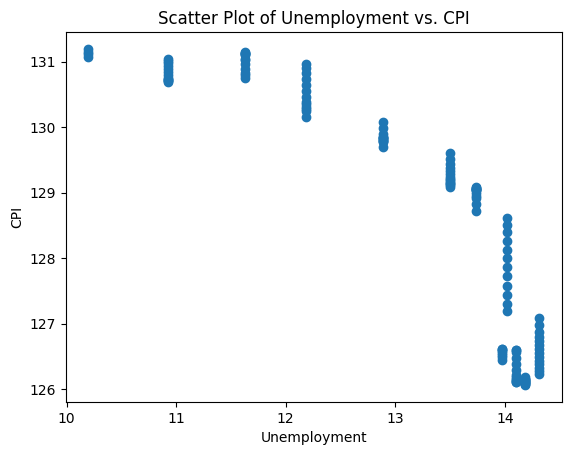

In [42]:
plt.scatter(hfi['Unemployment'], hfi['CPI'])
plt.xlabel('Unemployment')
plt.ylabel('CPI')
plt.title('Scatter Plot of Unemployment vs. CPI')
plt.show()


In [43]:
# Define the features (X) and the target (y)
X = hfi[['Unemployment']]
y = hfi['CPI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [45]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.8254327058829886
R-squared: 0.74004544512344


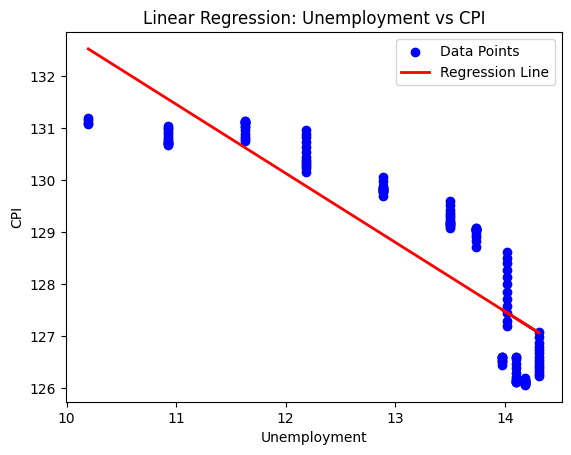

In [46]:
# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Unemployment')
plt.ylabel('CPI')
plt.title('Linear Regression: Unemployment vs CPI')
plt.legend()
plt.show()


In [47]:
# Define the features (X) and the target (y)
X = lfi[['Unemployment']]
y = lfi['CPI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.17140687377241223
R-squared: 0.9460186187720473


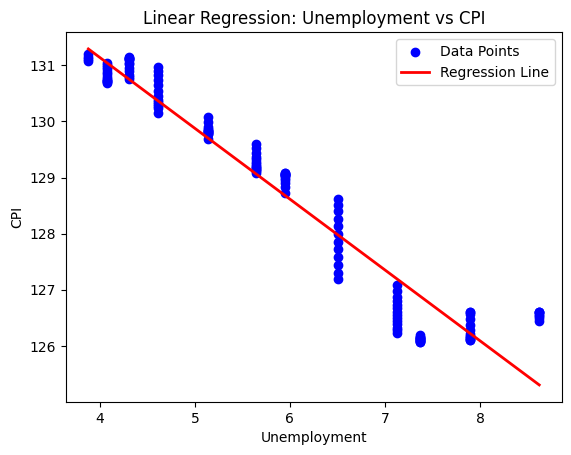

In [50]:
# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Unemployment')
plt.ylabel('CPI')
plt.title('Linear Regression: Unemployment vs CPI')
plt.legend()
plt.show()


In [59]:
correlation_matrix = df[['Weekly_Sales', 'CPI']].corr()
correlation_matrix

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.072634
CPI,-0.072634,1.000000


In [60]:
sb

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ed
1,1,02-12-2010,1641957.44,1,39.0,2.55,211.242,8.106,02-12
31,1,09-10-2010,1507460.69,1,79.0,2.56,211.495,7.787,09-10
42,1,11-26-2010,1955624.11,1,65.0,2.74,211.748,7.838,11-26
47,1,12-31-2010,1367320.01,1,48.0,2.94,211.405,7.838,12-31
53,1,02-11-2011,1649614.93,1,36.0,3.02,212.937,7.742,02-11
...,...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.0,3.74,186.674,8.625,09-09
6386,45,11-25-2011,1170672.94,1,49.0,3.49,188.350,8.523,11-25
6391,45,12-30-2011,869403.63,1,38.0,3.39,189.062,8.523,12-30
6397,45,02-10-2012,803657.12,1,37.0,3.64,189.708,8.424,02-10


In [62]:
# extract when thers no holiday 
sc = df[df['Holiday_Flag'] == 0]
sc

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ed
0,1,02-05-2010,1643690.90,0,42.0,2.57,211.096,8.106,02-05
2,1,02-19-2010,1611968.17,0,40.0,2.51,211.289,8.106,02-19
3,1,02-26-2010,1409727.59,0,47.0,2.56,211.320,8.106,02-26
4,1,03-05-2010,1554806.68,0,46.0,2.62,211.350,8.106,03-05
5,1,03-12-2010,1439541.59,0,58.0,2.67,211.381,8.106,03-12
...,...,...,...,...,...,...,...,...,...
6430,45,09-28-2012,713173.95,0,65.0,4.00,192.014,8.684,09-28
6431,45,10-05-2012,733455.07,0,65.0,3.98,192.170,8.667,10-05
6432,45,10-12-2012,734464.36,0,54.0,4.00,192.327,8.667,10-12
6433,45,10-19-2012,718125.53,0,56.0,3.97,192.331,8.667,10-19


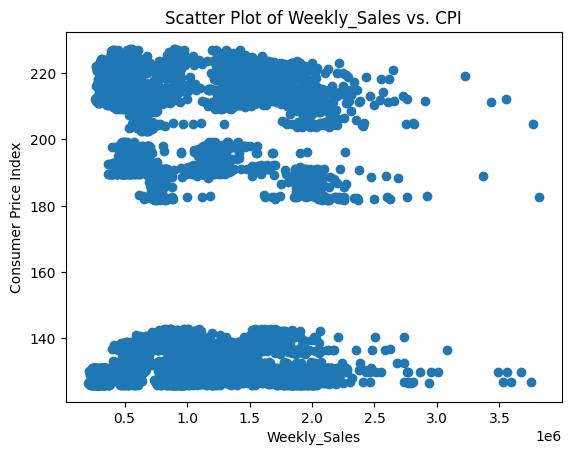

In [63]:
# scatter plot to see   'unemployment' and 'CPI' corralation 
plt.scatter(df['Weekly_Sales'], df['CPI'])
plt.xlabel('Weekly_Sales')
plt.ylabel('Consumer Price Index')
plt.title('Scatter Plot of Weekly_Sales vs. CPI')
plt.show()

In [64]:
correlation_matrix = df[['Weekly_Sales', 'CPI']].corr()
correlation_matrix


,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.072634
CPI,-0.072634,1.000000


In [65]:
correlation_matrix = sb[['Weekly_Sales', 'CPI']].corr()
correlation_matrix


,Weekly_Sales,CPI
Weekly_Sales,1.00000,-0.08097
CPI,-0.08097,1.00000


In [66]:
#making correlation matrix to see if thers any correlation
correlation_matrix = df[['Fuel_Price','Weekly_Sales', 'CPI','Unemployment','Temperature','Store']].corr()
correlation_matrix


,Fuel_Price,Weekly_Sales,CPI,Unemployment,Temperature,Store
Fuel_Price,1.000000,0.009515,-0.170572,-0.035039,0.144759,0.059940
Weekly_Sales,0.009515,1.000000,-0.072634,-0.106176,-0.063759,-0.335332
CPI,-0.170572,-0.072634,1.000000,-0.302020,0.177068,-0.209492
Unemployment,-0.035039,-0.106176,-0.302020,1.000000,0.100854,0.223531
Temperature,0.144759,-0.063759,0.177068,0.100854,1.000000,-0.022590
Store,0.059940,-0.335332,-0.209492,0.223531,-0.022590,1.000000


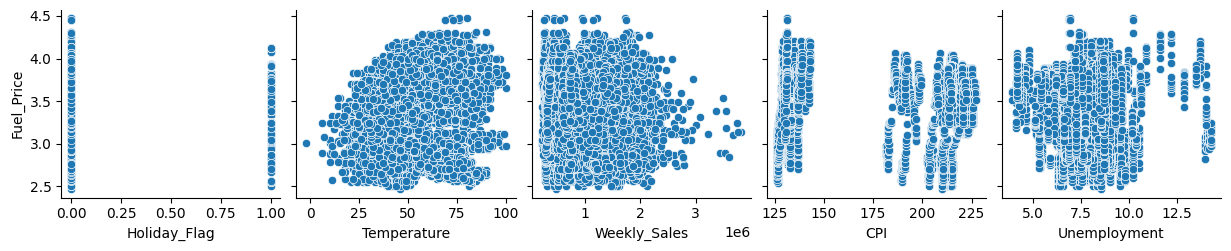

In [67]:


# Scatter plots of dependant variable vs independant variables
sns.pairplot(df, x_vars=['Holiday_Flag', 'Temperature', 'Weekly_Sales', 'CPI', 'Unemployment'], 
             y_vars=['Fuel_Price'], kind='scatter')
plt.show()



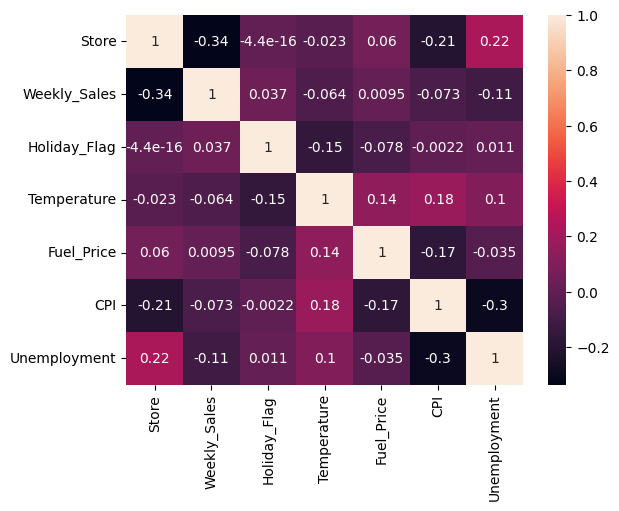

In [68]:
# heatmap to see if theres any correlation with other columns
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()


## conclusion 
 ## for the first question 
 which is ''Which holidays affect weekly sales the most''?      the answer is 11-25 which is thanks giving 


## FOR THE SECOND question

    which "is Which stores in the dataset have the lowest and highest unemployment rate?  What factors do you think are impacting the unemployment rate?"     the answer is store with lowest unemployment rate is store 4    and Store with highest unemployment rate is store 12     and the factors that is impacting the unemployment rate is the change in cpi  there are many factors on how cpi affect unemployment rate  in our case when the cpi increases the unemployment tend to decrease the few of reason behid it is  As CPI increases, the value of money decreases. This means people can buy fewer goods and services with the same amount of money. This can lead to a decrease in demand for goods and services, potentially causing businesses to cut back on production and lay off workers, increasing unemployment.  or people move out from that place to other place to get higher payment 

## third 
    question which is Is there any correlation between CPI and Weekly Sales?  How does the correlation differ when the Holiday Flag is 0 versus when the Holiday Flag is 1?
it have very weak correlation i don't think it'll affect anything directly and yes theres a differ when the Holiday Flag is 0 versus when the Holiday Flag is 1    but again its very weak 

## 4th 
which is Why do you think Fuel Price is included in this dataset?  What conclusions can be made about Fuel Price compared to any of the other fields?
 as we can see it have no correlation with any of the collumn but that doesn't mean it have no use  Here are some possible explanations for why Fuel Price might not be showing a correlation with other columns in the  data

 Potential for Future Analysis:The dataset creator might have anticipated that fuel price could become relevant in future analyses, especially if the timeframe or scope of the study expands.
 Including all potentially relevant data initially allows for more comprehensive exploration later on.

 Indirect Effects:While not directly correlated with other variables, fuel price might indirectly influence them through other factors not currently captured in the dataset.
    For example, fuel price could affect transportation costs, which could then impact product pricing or consumer spending habits.  it can affect the cpi

    







